Importing required modules and tools

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from matplotlib import style
from bs4 import BeautifulSoup as bs
%matplotlib inline

***Data about all US stocks is retrieved at 23:15 on 30-11-2022***

### Data Collection 

- Accessing the website 

In [75]:
responses=[]
for i in range(350):
    response = requests.get("https://groww.in/us-stocks/filter?closePriceHigh=10000&closePriceLow=0&isETF=false&isEtf=false&isFractional=false&marketCapHigh=5000000&marketCapLow=0&pageNo={}&pageSize=10&sortCategory=MARKET_CAP&sortOrderType=DESC".format(i))
    if response.status_code==200:
        data = bs(response.text)
        responses.append(data)
    else:
        print("Error ",response.status_code)

- Setting Individual dataframes

Companies

In [76]:
Companies = []
df = []
for company in responses:
    Companies.append(company.find_all("a",class_="fs14 fw500 truncate ussp76CompanyName"))
for i in Companies:
    df.append(pd.DataFrame(i))
Company = pd.concat(df).reset_index()   
print(Company.shape)
Company.drop(columns=["index"],inplace=True)
Company.rename(columns={0:"Company"},inplace=True)
Company.head()

(3500, 2)


,Company
0,Apple Inc
1,Microsoft Corporation
2,Alphabet Inc - Class A Shares
3,Alphabet Inc - Class C Shares
4,Amazon.com Inc.


Market price

In [77]:
MarketPrice = []
df = []
for response in responses:
    for j in response.find_all("td",class_="fs14 fw500"):
        MarketPrice.append(j.find("div"))
for i in MarketPrice:
    df.append(pd.DataFrame(i))
MarketPrice = pd.concat(df).reset_index()
print(MarketPrice.shape)
MarketPrice.drop(columns=["index"],inplace=True)
MarketPrice.rename(columns={0:"Market price"},inplace=True)
MarketPrice.head()

(3500, 2)


,Market price
0,$140.96
1,$241.94
2,$96.24
3,$96.5
4,$91.69


In [78]:
dfd,dfp = [],[]
for response in responses:
    x,y,d,p = [],[],[],[]
    for i in response.find_all("td"):
        x.append(i.find_all("span",class_=False))
    for i in range(1,len(x),4):
        y.append(x[i])
    for i in range(len(y)):
        d.append(y[i][0])
        p.append(y[i][1])
    dfd.append(pd.DataFrame(d)[0])
    dfp.append(pd.DataFrame(p)[2])
investD,investP = pd.DataFrame(pd.concat(dfd)).reset_index(),pd.DataFrame(pd.concat(dfp)).reset_index()
print(investD.shape)
investD.drop(columns=["index"],inplace=True)
investD.rename(columns={0:"Invest($)"},inplace=True)
investD.head()

(3500, 2)


,Invest($)
0,$0.21
1,$1.61
2,$1.05
3,$1.06
4,$0.73


In [79]:
print(investP.shape)
investP.drop(columns=["index"],inplace=True)
investP.rename(columns={2:"Invest(%)"},inplace=True)
investP.head()

(3500, 2)


,Invest(%)
0,0.15%
1,0.67%
2,1.10%
3,1.11%
4,0.79%


Close price

In [80]:
df = []
for response in responses:
    x = []
    for i in range(2,len(response.find_all("td",class_="fs14")),4):
        x.append(response.find_all("td",class_="fs14")[i])
    df.append(pd.DataFrame(x))
ClosePrice = pd.concat(df).reset_index()
print(ClosePrice.shape)
ClosePrice.drop(columns=["index"],inplace=True)
ClosePrice.rename(columns={0:"Close Price"},inplace=True)
ClosePrice.head()

(3500, 2)


,Close Price
0,$141.17
1,$240.33
2,$95.19
3,$95.44
4,$92.42


Market Capital

In [81]:
df = []
for response in responses:
    x = []
    for i in range(3,len(response.find_all("td",class_="fs14")),4):
        x.append(response.find_all("td",class_="fs14")[i])
    df.append(pd.DataFrame(x))
MarketCap = pd.concat(df).reset_index()
print(MarketCap.shape)
MarketCap.drop(columns=["index"],inplace=True)
MarketCap.rename(columns={0:"Market Cap"},inplace=True)
MarketCap.head()

(3500, 2)


,Market Cap
0,2.24T
1,1.79T
2,1.23T
3,1.23T
4,942.83B


- Combining individual Dataframes

In [20]:
data = pd.concat([Company,MarketPrice,investD,investP,ClosePrice,MarketCap],axis=1)
data.to_excel("Groww US_stocks.xlsx")

NameError: name 'Company' is not defined

In [6]:
data = pd.read_excel("Groww US_stocks.xlsx")
data.head(3)

,Unnamed: 0,Company,Market price,Invest($),Invest(%),Close Price,Market Cap
0,0,Apple Inc,$140.96,$0.21,0.15%,$141.17,2.24T
1,1,Microsoft Corporation,$241.94,$1.61,0.67%,$240.33,1.79T
2,2,Alphabet Inc - Class A Shares,$96.24,$1.05,1.10%,$95.19,1.23T


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3500 non-null   int64 
 1   Company       3500 non-null   object
 2   Market price  3500 non-null   object
 3   Invest($)     3500 non-null   object
 4   Invest(%)     3500 non-null   object
 5   Close Price   3500 non-null   object
 6   Market Cap    3500 non-null   object
dtypes: int64(1), object(6)
memory usage: 191.5+ KB


### Data pre-processing

- Removing redundant columns

In [8]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)
data.head(3)

,Company,Market price,Invest($),Invest(%),Close Price,Market Cap
0,Apple Inc,$140.96,$0.21,0.15%,$141.17,2.24T
1,Microsoft Corporation,$241.94,$1.61,0.67%,$240.33,1.79T
2,Alphabet Inc - Class A Shares,$96.24,$1.05,1.10%,$95.19,1.23T


- Processing individual columns

*'Market price' column*

In [9]:
"".join(("$2,123.34").split(","))

'$2123.34'

In [10]:
data.iloc[:,[1,2,4]]=data.iloc[:,[1,2,4]].applymap(lambda x:"".join(x.split(",")))
data.iloc[:,[1,2,4]]=data.iloc[:,[1,2,4]].replace("\$","74*",regex=True)
data.iloc[:,3]=data.iloc[:,3].replace("\%","",regex=True).astype(float)
data.iloc[:,5]=data.iloc[:,5].replace("T","*1000000000000",regex=True)
data.iloc[:,5]=data.iloc[:,5].replace("B","*1000000000",regex=True)
data.iloc[:,5]=data.iloc[:,5].replace("M","*1000000",regex=True)
data.iloc[:,1:].head()

,Market price,Invest($),Invest(%),Close Price,Market Cap
0,74*140.96,74*0.21,0.15,74*141.17,2.24*1000000000000
1,74*241.94,74*1.61,0.67,74*240.33,1.79*1000000000000
2,74*96.24,74*1.05,1.10,74*95.19,1.23*1000000000000
3,74*96.5,74*1.06,1.11,74*95.44,1.23*1000000000000
4,74*91.69,74*0.73,0.79,74*92.42,942.83*1000000000


In [11]:
data[["Market price","Invest($)","Close Price","Market Cap"]]=data[["Market price","Invest($)","Close Price","Market Cap"]].applymap(eval)

In [12]:
data.head()

,Company,Market price,Invest($),Invest(%),Close Price,Market Cap
0,Apple Inc,10431.04,15.54,0.15,10446.58,2.240000e+12
1,Microsoft Corporation,17903.56,119.14,0.67,17784.42,1.790000e+12
2,Alphabet Inc - Class A Shares,7121.76,77.70,1.10,7044.06,1.230000e+12
3,Alphabet Inc - Class C Shares,7141.00,78.44,1.11,7062.56,1.230000e+12
4,Amazon.com Inc.,6785.06,54.02,0.79,6839.08,9.428300e+11


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       3500 non-null   object 
 1   Market price  3500 non-null   float64
 2   Invest($)     3500 non-null   float64
 3   Invest(%)     3500 non-null   float64
 4   Close Price   3500 non-null   float64
 5   Market Cap    3500 non-null   float64
dtypes: float64(5), object(1)
memory usage: 164.2+ KB


- Renaming columns

In [14]:
data.rename(columns={"Invest($)":"Invest(Rs)"},inplace=True)
data.head()

,Company,Market price,Invest(Rs),Invest(%),Close Price,Market Cap
0,Apple Inc,10431.04,15.54,0.15,10446.58,2.240000e+12
1,Microsoft Corporation,17903.56,119.14,0.67,17784.42,1.790000e+12
2,Alphabet Inc - Class A Shares,7121.76,77.70,1.10,7044.06,1.230000e+12
3,Alphabet Inc - Class C Shares,7141.00,78.44,1.11,7062.56,1.230000e+12
4,Amazon.com Inc.,6785.06,54.02,0.79,6839.08,9.428300e+11


Now all values are in required format 

### Data visualization

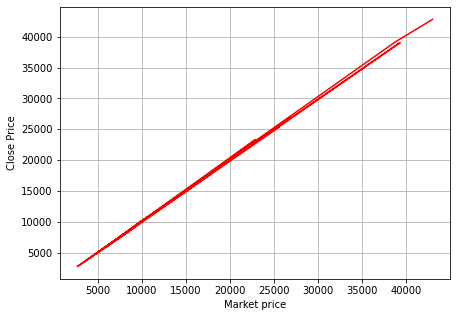

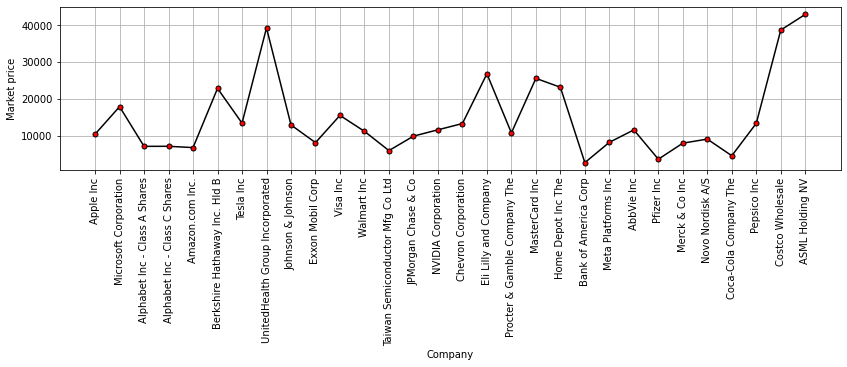

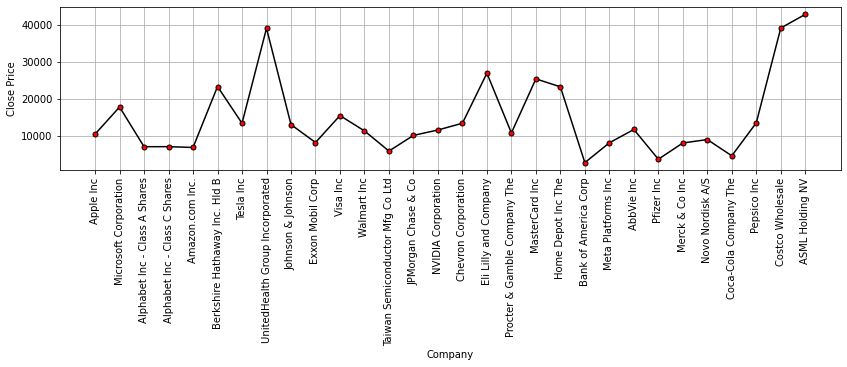

In [60]:
d = data.head(30)

plt.figure(figsize=(7,5))
plt.plot(d["Market price"],d["Close Price"],color="red")
plt.ylabel("Close Price")
plt.xlabel("Market price")
plt.grid()

plt.figure(figsize=(14,3))
plt.plot(d.Company,d["Market price"],marker="o",markersize=5,markerfacecolor="red",color="k")
plt.ylabel("Market price")
plt.xlabel("Company")
plt.grid()
plt.xticks(rotation=90);

plt.figure(figsize=(14,3))
plt.plot(d.Company,d["Close Price"],marker="o",markersize=5,markerfacecolor="red",color="k")
plt.ylabel("Close Price")
plt.xlabel("Company")
plt.grid()
plt.xticks(rotation=90);

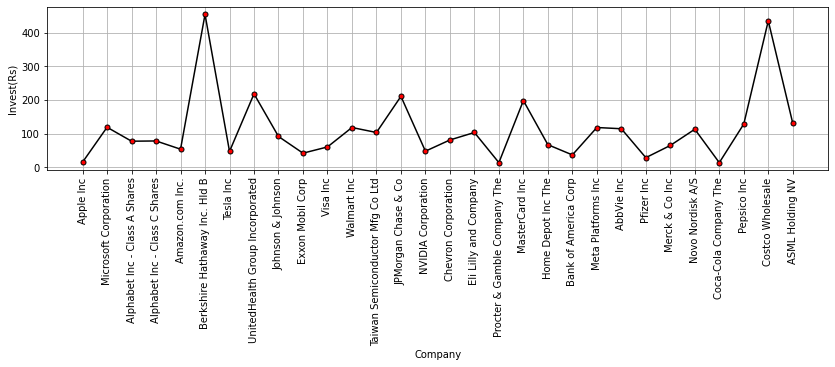

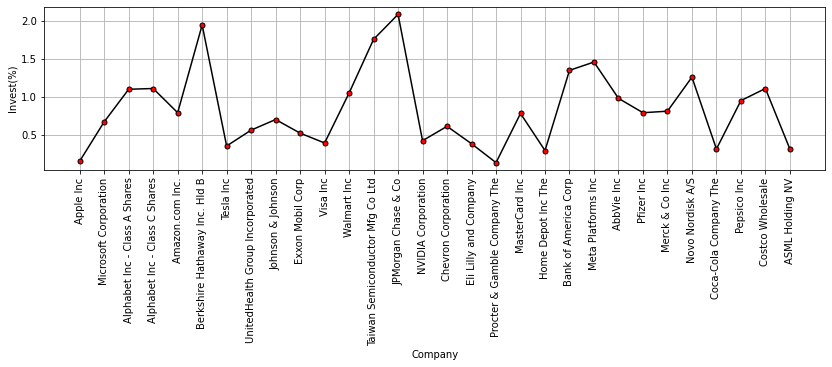

In [57]:
plt.figure(figsize=(14,3))
plt.plot(d.Company,d["Invest(Rs)"],marker="o",markersize=5,markerfacecolor="red",color="k")
plt.ylabel("Invest(Rs)")
plt.xlabel("Company")
plt.grid()
plt.xticks(rotation=90);

plt.figure(figsize=(14,3))
plt.plot(d.Company,d["Invest(%)"],marker="o",markersize=5,markerfacecolor="red",color="k")
plt.ylabel("Invest(%)")
plt.xlabel("Company")
plt.grid()
plt.xticks(rotation=90);

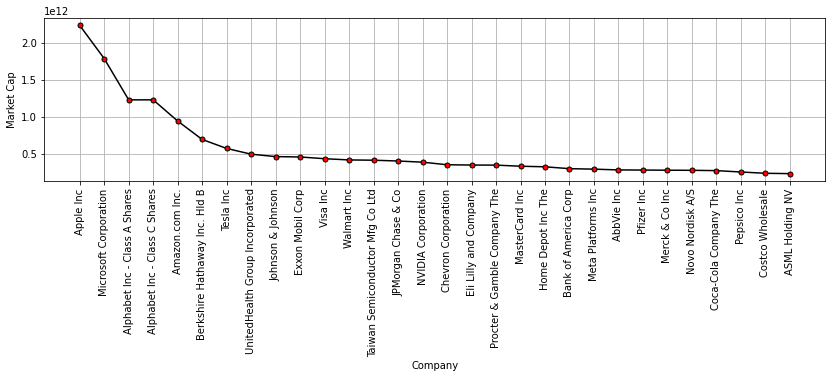

In [35]:
f = data.head(30)
plt.figure(figsize=(14,3))
plt.plot(f.Company,f["Market Cap"],marker="o",markersize=5,markerfacecolor="red",color="k")
plt.ylabel("Market Cap")
plt.xlabel("Company")
plt.grid()
plt.xticks(rotation=90);

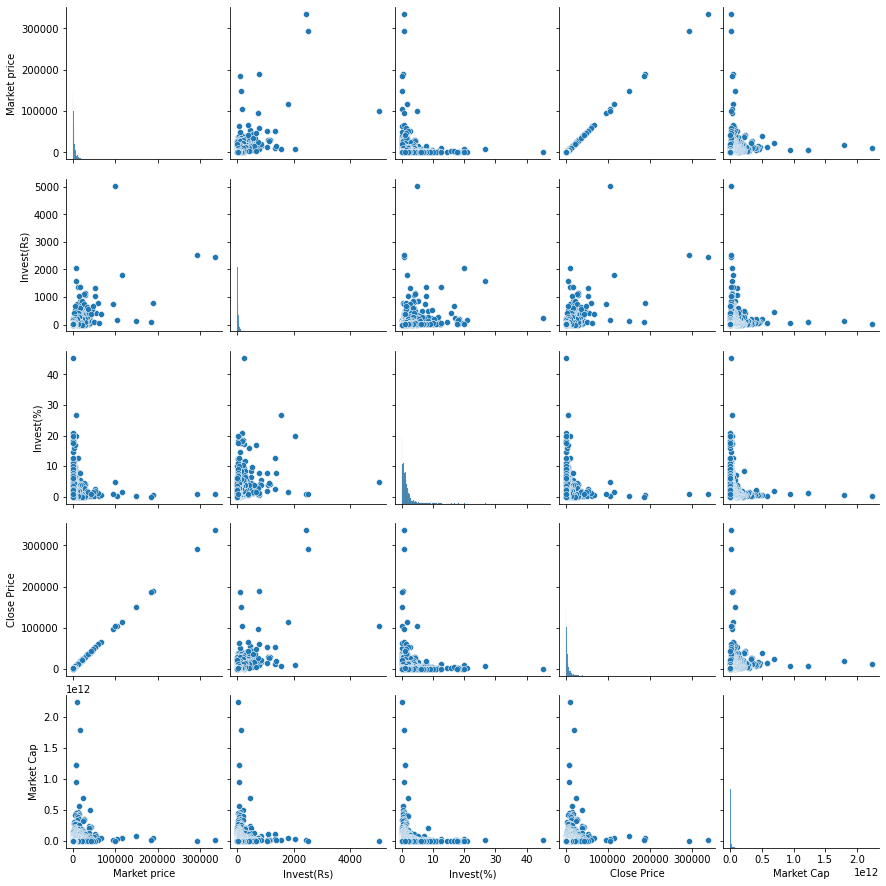

In [44]:
sns.pairplot(data)